In [1]:
import json
import os

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import decks

2022-09-09 22:20:54.933338: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-09 22:20:55.659267: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-09 22:20:55.659352: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-09-09 22:20:55.717917: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-09-09 22:20:56.944845: W tensorflow/stream_executor/platform/de

In [2]:
sns.set_style("darkgrid")

In [3]:
df = pd.read_csv("carer.csv", index_col=0)
df

,text,emotions,split
0,im actually scared to live here sometimes i al...,2,0
1,i leave school feeling beaten and battered,4,0
2,i think anyone who s ever been in a room full ...,4,0
3,i feel ok and i feel happy for the team to get...,2,0
4,im having a bit of a hectic morning over here ...,0,0
...,...,...,...
416804,i tried to ignore it tried to push through and...,4,2
416805,i feel kinda blank and kinda jealous of the tw...,4,2
416806,i guess on days when im feeling mentally distr...,0,2
416807,im feeling very confident in my predictions fo...,2,2


In [4]:
df["emotions"].value_counts()

2    138411
4    119358
0     56719
1     47306
3     33997
5     14763
Name: emotions, dtype: int64

In [5]:
emotions = ["anger", "fear", "joy", "love", "sadness", "surprise"]

In [6]:
data = {}

def rename(name):
    gen, epoch, batch = name.split("-")
    return f"C{gen[1:].strip('0')}"

for directory in filter(lambda x: x.startswith("2"), sorted(os.listdir("./data/history"))):
    with open(decks.DATA_DIR / f"history/{directory}") as f:
        data |= {rename(directory[:-5]): json.load(f)}

sorted(data.keys())

['C1', 'C2', 'C3', 'C4', 'C5']

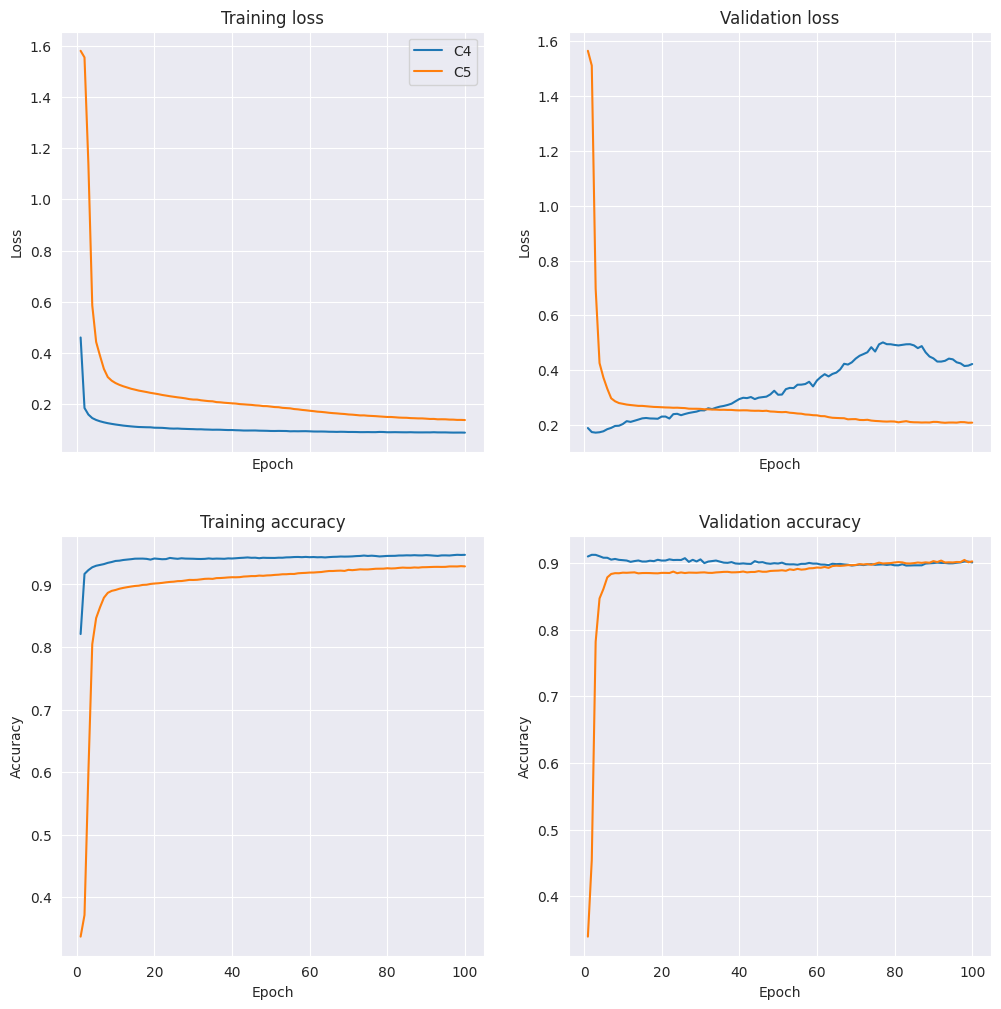

In [7]:
fig, axs = plt.subplots(2, 2, figsize=(12, 12), sharex=True)

axs[0][0].set_title("Training loss")
axs[0][0].set_xlabel("Epoch")
axs[0][0].set_ylabel("Loss")
for key in ("C4", "C5"):
    sns.lineplot(ax=axs[0][0], x=range(1, 101), y=data[key]["loss"][:100], label=key)

axs[0][1].set_title("Validation loss")
axs[0][1].set_xlabel("Epoch")
axs[0][1].set_ylabel("Loss")
for key in ("C4", "C5"):
    sns.lineplot(ax=axs[0][1], x=range(1, 101), y=data[key]["val_loss"][:100])

axs[1][0].set_title("Training accuracy")
axs[1][0].set_xlabel("Epoch")
axs[1][0].set_ylabel("Accuracy")
for key in ("C4", "C5"):
    sns.lineplot(ax=axs[1][0], x=range(1, 101), y=data[key]["accuracy"][:100])

axs[1][1].set_title("Validation accuracy")
axs[1][1].set_xlabel("Epoch")
axs[1][1].set_ylabel("Accuracy")
for key in ("C4", "C5"):
    sns.lineplot(ax=axs[1][1], x=range(1, 101), y=data[key]["val_accuracy"][:100])

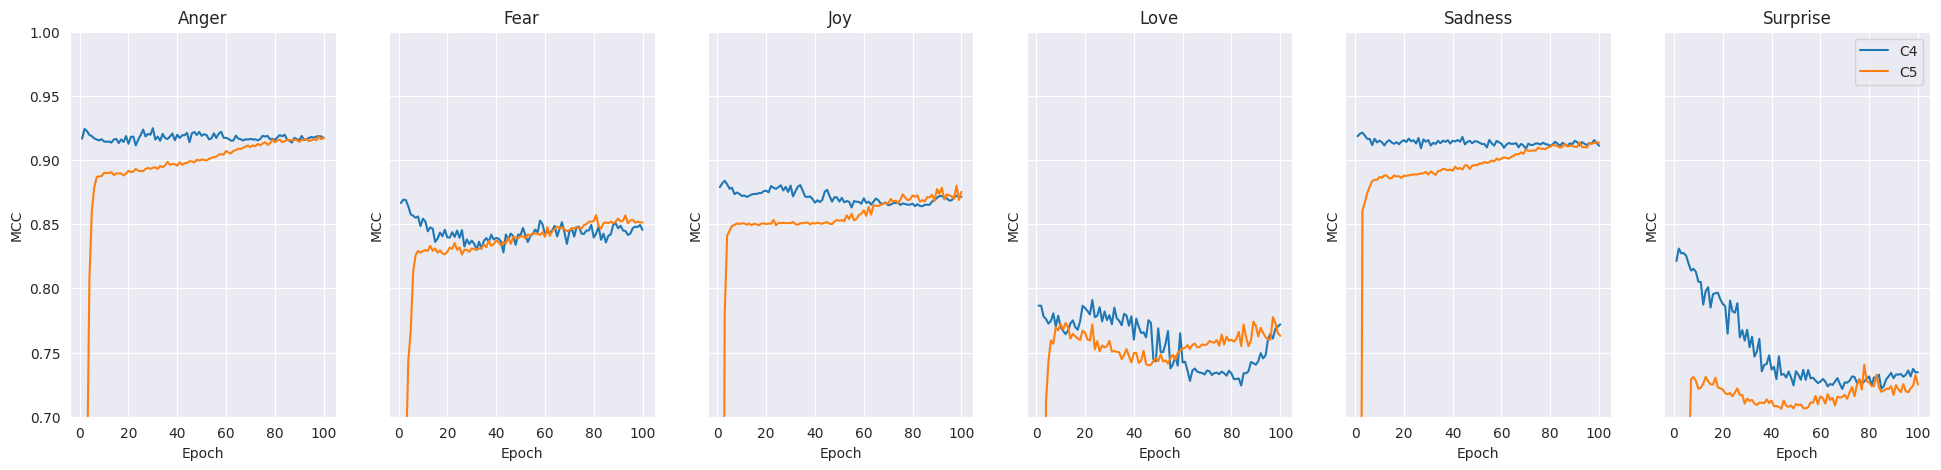

In [10]:
fig, axs = plt.subplots(1, 6, figsize=(24, 5), sharex=True, sharey=True)

for i in range(6):
    # ax = axs[i // 3][i % 3]
    ax = axs[i]
    for key in ("C4", "C5"):
        ax.set_title(emotions[i].title())
        ax.set_xlabel("Epoch")
        ax.set_ylabel("MCC")
        ax.set_ylim(0.7, 1)
        sns.lineplot(ax=ax, x=range(1, 101), y=data[key][f"val_mcc_{i}"][:100], label=key if i == 5 else None)

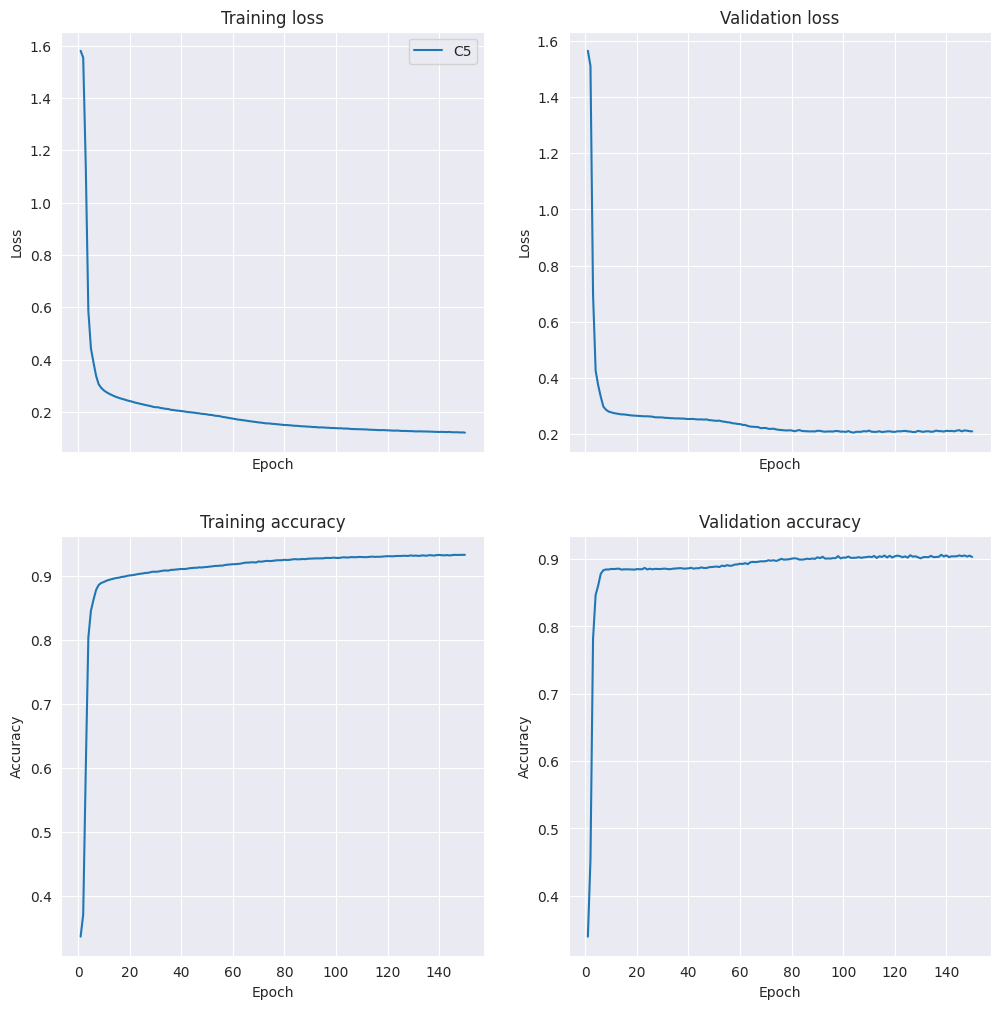

In [9]:
fig, axs = plt.subplots(2, 2, figsize=(12, 12), sharex=True)

axs[0][0].set_title("Training loss")
axs[0][0].set_xlabel("Epoch")
axs[0][0].set_ylabel("Loss")
for key in ("C5",):
    sns.lineplot(ax=axs[0][0], x=range(1, 151), y=data[key]["loss"][:150], label=key)

axs[0][1].set_title("Validation loss")
axs[0][1].set_xlabel("Epoch")
axs[0][1].set_ylabel("Loss")
for key in ("C5",):
    sns.lineplot(ax=axs[0][1], x=range(1, 151), y=data[key]["val_loss"][:150])

axs[1][0].set_title("Training accuracy")
axs[1][0].set_xlabel("Epoch")
axs[1][0].set_ylabel("Accuracy")
for key in ("C5",):
    sns.lineplot(ax=axs[1][0], x=range(1, 151), y=data[key]["accuracy"][:150])

axs[1][1].set_title("Validation accuracy")
axs[1][1].set_xlabel("Epoch")
axs[1][1].set_ylabel("Accuracy")
for key in ("C5",):
    sns.lineplot(ax=axs[1][1], x=range(1, 151), y=data[key]["val_accuracy"][:150])